In [129]:
%matplotlib inline

import numpy as np
import scipy as sc
from scipy import io

from numpy import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [130]:
data = io.loadmat('69dataset.mat')
X = data['X']
Y = data['Y']
prior = data['prior']

In [131]:
def normalize(data):
    data = np.transpose(data)
    output = []
    for row in data:
        this_row = row
        mean = np.mean(this_row)
        std = np.std(this_row)
        if std == 0:
            normalized = np.zeros(len(this_row))
        else:
            normalized = (this_row-mean)/std
        output.append(normalized.astype(float))
        
    output = np.transpose(output)
    return np.asarray(output)

In [132]:
def split_into_train_test(data, train_per):
    length = len(data)
    train_rows = (int)(train_per * length)
    random.shuffle(data)
    train = data[:train_rows]
    test = data[train_rows:]
    
    return train, test

In [133]:
# normalize the data
normalized_x = normalize(X)
normalized_y = normalize(Y)
prior = normalize(prior)

# make training and test sets of the normalize data
train_x, test_x = split_into_train_test(normalized_x, .8)
train_y, test_y = split_into_train_test(normalized_y, .8)

### Approach 1: discriminative model
blablabla

### Approach 2: generative model and Bayes' rule
blablabla

In [160]:
lamb = 10**-6
nPixels = 784
I = np.identity(nPixels)

first = np.dot(np.transpose(train_x), train_x)
second = first + lamb*I
third = np.linalg.inv(second)
fourth = np.dot(third, np.transpose(train_x))
B = np.dot(fourth, train_y)

print("B is computed.")

B is computed.


In [161]:
first = np.dot(np.transpose(prior), prior)
sigPrior = first / (len(prior)-1)
sigPrior[np.diag_indices_from(sigPrior)] += 10**-6 # regularize

print("Sigma prior is computed.")

Sigma prior is computed.


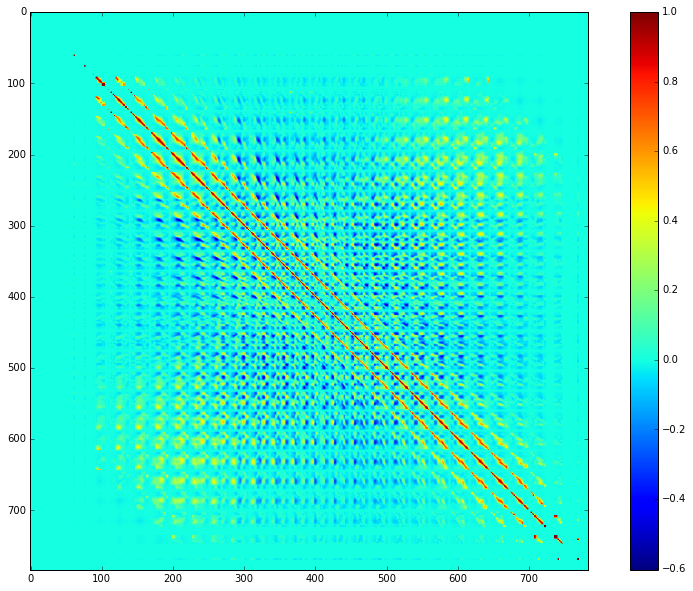

In [162]:
plt.figure(1, figsize=(15,10))

cax = plt.imshow(sigPrior)
plt.colorbar(cax)

Explanation of above figure

### Question 3: Reconstruction

In [177]:
nVoxels = 3092
I = np.identity(nVoxels)
sig = (10**-3)*I

first = np.dot(B, np.linalg.inv(sig))
second = np.dot(first, np.transpose(B))
third = np.linalg.inv(sigPrior) + second
fourth = np.linalg.inv(third)
fifth = np.dot(fourth, B)
muPost = np.dot(fifth, np.linalg.inv(sig))

In [178]:
def denormalize(original, data):
    original = np.transpose(original.astype(float))
    data = np.transpose(data.astype(float))
    
    output = []
    for row_ori, row_data in zip(original, data):
        mean = np.mean(row_ori)
        std = np.std(row_ori)
        row_out = row_data * std + mean
        
        output.append(row_out.astype(float))
        
    output = np.transpose(output)
    return output   

In [179]:
out = np.dot(muPost, np.transpose(train_y))
out = np.transpose(out)
out = denormalize(train_y, out)

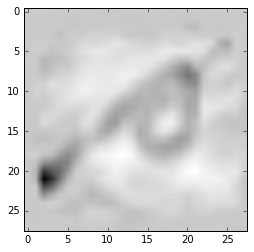

In [188]:
plt.imshow(out[40].reshape(28, 28), cmap=cm.gray_r)